In [64]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-adapt-basic)

Let's run adaptive RK on  $u'=e^{t-u\sin u}$.

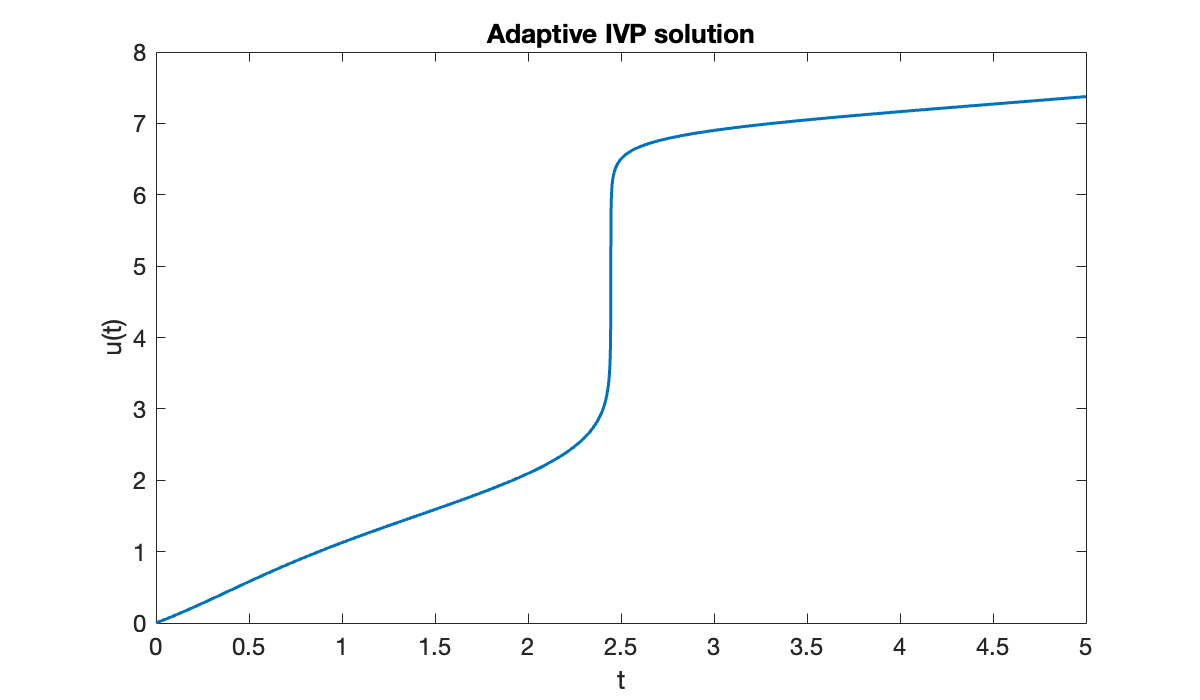

In [65]:
ivp = ode;
ivp.ODEFcn = @(t, u, p) exp(t - u * sin(u));
ivp.InitialValue = 0;
a = 0;  b = 5;

[t, u] = rk23(ivp, a, b, 1e-5);
clf, plot(t, u)
xlabel("t");  ylabel("u(t)")
title(("Adaptive IVP solution"));

The solution makes a very abrupt change near $t=2.4$. The resulting time steps vary over three orders of magnitude.

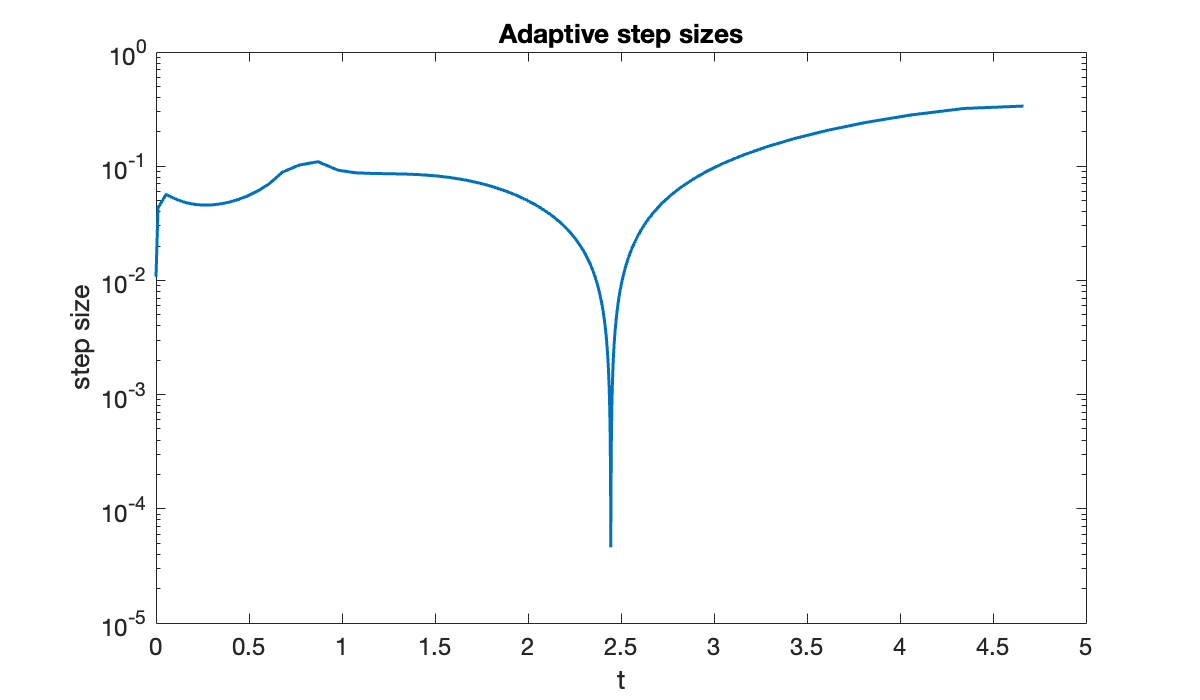

In [66]:
Delta_t = diff(t);
semilogy(t(1:end-1), Delta_t) 
xlabel("t");  ylabel("step size")
title(("Adaptive step sizes"));

If we had to run with a uniform step size to get this accuracy, it would be

In [67]:
fprintf("minimum step size = %.2e", min(Delta_t))

minimum step size = 4.61e-05

On the other hand, the average step size that was actually taken was

In [68]:
fprintf("average step size = %.2e", mean(Delta_t))

average step size = 3.21e-02

We took fewer steps by a factor of almost 1000! Even accounting for the extra stage per step and the occasional rejected step, the savings are clear.